<a href="https://colab.research.google.com/github/kittikhun62/efficientnet_keras_transfer_learning/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#เรียกใช้ CSV

In [1]:
import pandas as pd
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv (r'/content/drive/My Drive/data - All SEM.csv')
df

,No,Name_file,Name_Paper,journal,path_Picture,detail,Class,BET,Size(mico)
0,1,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/All SEM/pore-sb/PCC(RS...,original,0-500,135.06,5
1,2,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/All SEM/pore-sb/PCC(RS...,zoom1,0-500,135.06,10
2,3,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/All SEM/pore-sb/PCC(RS...,zoom2,0-500,135.06,10
3,4,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/All SEM/pore-sb/PCC(RS...,zoom3,0-500,135.06,10
4,5,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/All SEM/pore-sb/PCC(RS...,zoom4,0-500,135.06,10
...,...,...,...,...,...,...,...,...,...
315,316,1-s2.0-S0926669022000292-main,Low-cost activated carbon preparation from Cor...,Industrial Crops & Products,/content/drive/My Drive/All SEM/1-s2.0-S092666...,original,0-500,11.00,10
316,317,1-s2.0-S0926669022000292-main,Low-cost activated carbon preparation from Cor...,Industrial Crops & Products,/content/drive/My Drive/All SEM/1-s2.0-S092666...,original,0-500,0.25,10
317,318,1-s2.0-S0926669022000292-main,Low-cost activated carbon preparation from Cor...,Industrial Crops & Products,/content/drive/My Drive/All SEM/1-s2.0-S092666...,original,0-500,35.00,10
318,319,1-s2.0-S0926669022000292-main,Low-cost activated carbon preparation from Cor...,Industrial Crops & Products,/content/drive/My Drive/All SEM/1-s2.0-S092666...,original,501-1000,583.00,10


## hist


In [4]:
import matplotlib.pyplot as plt

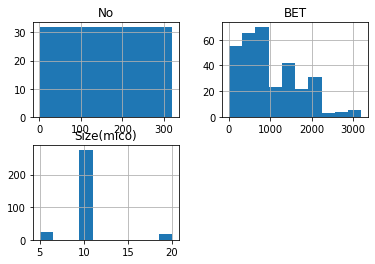

In [5]:
df.hist();

In [6]:
a = df['BET']

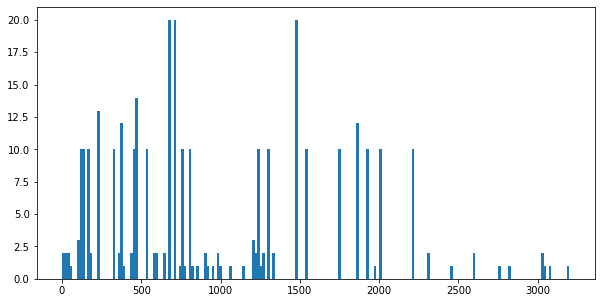

In [7]:
fig, ax = plt.subplots(figsize =(10, 5))
ax.hist(a, bins = 200)
plt.show()

In [8]:
classes = ['0-500','501-1000','1001-1500','1501-2000','2001-2500','2501-3000','3001-3500']
len(classes)

7

#Imports

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import os
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

#กำหนดค่าพารามิเตอร์


In [10]:
batch_size = 20
width = 150
height = 150
epochs = 20
NUM_TRAIN = 300 
NUM_TEST = 20
dropout_rate = 0.2
input_shape = (height, width, 3)

#Clone efficientnet repo


In [11]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/


/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 293, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 293 (delta 98), reused 84 (delta 84), pack-reused 184
Receiving objects: 100% (293/293), 6.94 MiB | 15.47 MiB/s, done.
Resolving deltas: 100% (171/171), done.
/content/efficientnet_keras_transfer_learning


In [12]:
# Options: EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
# Higher the number, the more complex the model is.
from efficientnet import EfficientNetB0 as Net
from efficientnet import center_crop_and_resize, preprocess_input

In [13]:
# loading pretrained conv base model
# โหลดโมเดล มาโดยตัด output ของโมเดลออก เเต่ยังใช้ input อันเดิม
# เเละโหลด weight ของโมเดล มาด้วยที่ชื่อว่า imagenet
conv_base = Net(weights='imagenet', include_top=False, input_shape=input_shape)

16717576/16717576 [==============================] - 2s 0us/step


In [14]:
conv_base.summary() #ดู Summary

Model: "efficientnet-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 75, 75, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 75, 75, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                    

#Download 

In [15]:
base_dir = '/content/drive/My Drive/Project'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [16]:
classes = ['0-500','501-1000','1001-1500','1501-2000','2001-2500','2501-3000','3001-3500']
len(classes)

7

In [17]:
train_1_dir = os.path.join(train_dir, '0-500')
os.makedirs(train_1_dir, exist_ok=True)

train_2_dir = os.path.join(train_dir, '501-1000')
os.makedirs(train_2_dir, exist_ok=True)

train_3_dir = os.path.join(train_dir, '1001-1500')
os.makedirs(train_3_dir, exist_ok=True)

train_4_dir = os.path.join(train_dir, '1501-2000')
os.makedirs(train_4_dir, exist_ok=True)

train_5_dir = os.path.join(train_dir, '2001-2500')
os.makedirs(train_5_dir, exist_ok=True)

train_6_dir = os.path.join(train_dir, '2501-3000')
os.makedirs(train_6_dir, exist_ok=True)

train_7_dir = os.path.join(train_dir, '3001-3500')
os.makedirs(train_7_dir, exist_ok=True)

validation_1_dir = os.path.join(validation_dir, '0-500')
os.makedirs(validation_1_dir, exist_ok=True)

validation_2_dir = os.path.join(validation_dir, '501-1000')
os.makedirs(validation_2_dir, exist_ok=True)

validation_3_dir = os.path.join(validation_dir, '1001-1500')
os.makedirs(validation_3_dir, exist_ok=True)

validation_4_dir = os.path.join(validation_dir, '1501-2000')
os.makedirs(validation_4_dir, exist_ok=True)

validation_5_dir = os.path.join(validation_dir, '2001-2500')
os.makedirs(validation_5_dir, exist_ok=True)

validation_6_dir = os.path.join(validation_dir, '2501-3000')
os.makedirs(validation_6_dir, exist_ok=True)

validation_7_dir = os.path.join(validation_dir, '3001-3500')
os.makedirs(validation_7_dir, exist_ok=True)

test_1_dir = os.path.join(test_dir, '0-500')
os.makedirs(test_1_dir, exist_ok=True)

test_2_dir = os.path.join(test_dir, '501-1000')
os.makedirs(test_2_dir, exist_ok=True)

test_3_dir = os.path.join(test_dir, '1001-1500')
os.makedirs(test_3_dir, exist_ok=True)

test_4_dir = os.path.join(test_dir, '1501-2000')
os.makedirs(test_4_dir, exist_ok=True)

test_5_dir = os.path.join(test_dir, '2001-2500')
os.makedirs(test_5_dir, exist_ok=True)

test_6_dir = os.path.join(test_dir, '2501-3000')
os.makedirs(test_6_dir, exist_ok=True)

test_7_dir = os.path.join(test_dir, '3001-3500')
os.makedirs(test_7_dir, exist_ok=True)



In [18]:
df

,No,Name_file,Name_Paper,journal,path_Picture,detail,Class,BET,Size(mico)
0,1,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/All SEM/pore-sb/PCC(RS...,original,0-500,135.06,5
1,2,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/All SEM/pore-sb/PCC(RS...,zoom1,0-500,135.06,10
2,3,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/All SEM/pore-sb/PCC(RS...,zoom2,0-500,135.06,10
3,4,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/All SEM/pore-sb/PCC(RS...,zoom3,0-500,135.06,10
4,5,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/All SEM/pore-sb/PCC(RS...,zoom4,0-500,135.06,10
...,...,...,...,...,...,...,...,...,...
315,316,1-s2.0-S0926669022000292-main,Low-cost activated carbon preparation from Cor...,Industrial Crops & Products,/content/drive/My Drive/All SEM/1-s2.0-S092666...,original,0-500,11.00,10
316,317,1-s2.0-S0926669022000292-main,Low-cost activated carbon preparation from Cor...,Industrial Crops & Products,/content/drive/My Drive/All SEM/1-s2.0-S092666...,original,0-500,0.25,10
317,318,1-s2.0-S0926669022000292-main,Low-cost activated carbon preparation from Cor...,Industrial Crops & Products,/content/drive/My Drive/All SEM/1-s2.0-S092666...,original,0-500,35.00,10
318,319,1-s2.0-S0926669022000292-main,Low-cost activated carbon preparation from Cor...,Industrial Crops & Products,/content/drive/My Drive/All SEM/1-s2.0-S092666...,original,501-1000,583.00,10


In [19]:
val = df[df['No'].between(257,289)]
train = df[df['No'].between(1,256)]
test = df[df['No'].between(290,320)] 

#Path Train
T1_train = train[train['Class']=='0-500' ]
T1_path_train = T1_train['path_Picture'].tolist() 
T2_train = train[train['Class']=='501-1000' ]
T2_path_train = T2_train['path_Picture'].tolist() 
T3_train = train[train['Class']=='1001-1500' ]
T3_path_train = T3_train['path_Picture'].tolist()
T4_train = train[train['Class']=='1501-2000' ]
T4_path_train = T4_train['path_Picture'].tolist()
T5_train = train[train['Class']=='2001-2500' ]
T5_path_train = T5_train['path_Picture'].tolist()
T6_train = train[train['Class']=='2501-3000' ]
T6_path_train = T6_train['path_Picture'].tolist()
T7_train = train[train['Class']=='3001-3500' ]
T7_path_train = T7_train['path_Picture'].tolist()

#Path Validation
T1_val = val[val['Class']=='0-500' ]
T1_path_val = T1_val['path_Picture'].tolist() 
T2_val = val[val['Class']=='501-1000' ]
T2_path_val = T2_val['path_Picture'].tolist() 
T3_val = val[val['Class']=='1001-1500' ]
T3_path_val = T3_val['path_Picture'].tolist()
T4_val = val[val['Class']=='1501-2000' ]
T4_path_val = T4_val['path_Picture'].tolist()
T5_val = val[val['Class']=='2001-2500' ]
T5_path_val = T5_val['path_Picture'].tolist()
T6_val = val[val['Class']=='2501-3000' ]
T6_path_val = T6_val['path_Picture'].tolist()
T7_val = val[val['Class']=='3001-3500' ]
T7_path_val = T7_val['path_Picture'].tolist()

#Path Test
T1_test = test[test['Class']=='0-500' ]
T1_path_test = T1_test['path_Picture'].tolist() 
T2_test = test[test['Class']=='501-1000' ]
T2_path_test = T2_test['path_Picture'].tolist() 
T3_test = test[test['Class']=='1001-1500' ]
T3_path_test = T3_test['path_Picture'].tolist()
T4_test = test[test['Class']=='1501-2000' ]
T4_path_test = T4_test['path_Picture'].tolist()
T5_test = test[test['Class']=='2001-2500' ]
T5_path_test = T5_test['path_Picture'].tolist()
T6_test = test[test['Class']=='2501-3000' ]
T6_path_test = T6_test['path_Picture'].tolist()
T7_test = test[test['Class']=='3001-3500' ]
T7_path_test= T7_test['path_Picture'].tolist()

#Train

In [20]:
fnames = T1_path_train
for fname in fnames:
    dst = os.path.join(train_1_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

fnames = T2_path_train
for fname in fnames:
    dst = os.path.join(train_2_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)
    
fnames = T3_path_train 
for fname in fnames:
    dst = os.path.join(train_3_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

fnames = T4_path_train
for fname in fnames:
    dst = os.path.join(train_4_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)
    
fnames = T5_path_train
for fname in fnames:
    dst = os.path.join(train_5_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)  

fnames = T6_path_train  
for fname in fnames:
    dst = os.path.join(train_6_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)  
    
fnames = T7_path_train
for fname in fnames:
    dst = os.path.join(train_7_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)



#Validation

In [21]:
fnames = T1_path_test
for fname in fnames:
    dst = os.path.join(validation_1_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

fnames = T2_path_test
for fname in fnames:
    dst = os.path.join(validation_2_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)
    
fnames = T3_path_test 
for fname in fnames:
    dst = os.path.join(validation_3_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

fnames = T4_path_test
for fname in fnames:
    dst = os.path.join(validation_4_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)
    
fnames = T5_path_test
for fname in fnames:
    dst = os.path.join(validation_5_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)  

fnames = T6_path_test  
for fname in fnames:
    dst = os.path.join(validation_6_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)  
    
fnames = T7_path_test
for fname in fnames:
    dst = os.path.join(validation_7_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

# Test



In [22]:
fnames = T1_path_val
for fname in fnames:
    dst = os.path.join(test_1_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

fnames = T2_path_val
for fname in fnames:
    dst = os.path.join(test_2_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)
    
fnames = T3_path_val 
for fname in fnames:
    dst = os.path.join(test_3_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

fnames = T4_path_val
for fname in fnames:
    dst = os.path.join(test_4_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)
    
fnames = T5_path_val
for fname in fnames:
    dst = os.path.join(test_5_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)  

fnames = T6_path_val  
for fname in fnames:
    dst = os.path.join(test_6_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)  
    
fnames = T7_path_val
for fname in fnames:
    dst = os.path.join(test_7_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

In [23]:
print('total training 1 images:', len(os.listdir(train_1_dir))) 
print('total training 2 images:', len(os.listdir(train_2_dir)))
print('total training 3 images:', len(os.listdir(train_3_dir)))
print('total training 4 images:', len(os.listdir(train_4_dir))) 
print('total training 5 images:', len(os.listdir(train_5_dir)))
print('total training 6 images:', len(os.listdir(train_6_dir)))
print('total training 7 images:', len(os.listdir(train_7_dir)),'\n')

print('total validation 1 images:', len(os.listdir(validation_1_dir)))
print('total validation 2 images:', len(os.listdir(validation_2_dir)))
print('total validation 3 images:', len(os.listdir(validation_3_dir)))
print('total validation 4 images:', len(os.listdir(validation_4_dir)))
print('total validation 5 images:', len(os.listdir(validation_5_dir)))
print('total validation 6 images:', len(os.listdir(validation_6_dir)))
print('total validation 7 images:', len(os.listdir(validation_7_dir)),'\n')

print('total test 1 images:', len(os.listdir(test_1_dir)))
print('total test 2 images:', len(os.listdir(test_2_dir)))
print('total test 3 images:', len(os.listdir(test_3_dir)))
print('total test 4 images:', len(os.listdir(test_4_dir)))
print('total test 5 images:', len(os.listdir(test_5_dir)))
print('total test 6 images:', len(os.listdir(test_6_dir)))
print('total test 7 images:', len(os.listdir(test_7_dir)),'\n')

total training 1 images: 82
total training 2 images: 70
total training 3 images: 40
total training 4 images: 42
total training 5 images: 20
total training 6 images: 2
total training 7 images: 0 

total validation 1 images: 9
total validation 2 images: 10
total validation 3 images: 6
total validation 4 images: 0
total validation 5 images: 1
total validation 6 images: 2
total validation 7 images: 3 

total test 1 images: 16
total test 2 images: 6
total test 3 images: 7
total test 4 images: 0
total test 5 images: 2
total test 6 images: 0
total test 7 images: 2 



In [24]:
# Train ด้วย ImageDataGenerator ของ Keras ซึ่งจะเพิ่มข้อมูลเสริมระหว่างการฝึกเพื่อลดโอกาสเกิด overfitting
#overfitting เกิดจากข้อมูลที่ซับซ้อนกันเกินไป
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory #ไดเรกเป้าหมาย
        train_dir,
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory( #การดึงภาพจาก Directory มาเข้าโมเดล 
        validation_dir,
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')
     

Found 256 images belonging to 7 classes.
Found 31 images belonging to 7 classes.


In [25]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))
# model.add(layers.Flatten(name="flatten"))
if dropout_rate > 0:
    model.add(layers.Dropout(dropout_rate, name="dropout_out"))
# model.add(layers.Dense(256, activation='relu', name="fc1"))
model.add(layers.Dense(7, activation='softmax', name="fc_out"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 5, 5, 1280)       4049564   
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 7)                 8967      
                                                                 
Total params: 4,058,531
Trainable params: 4,016,515
Non-trainable params: 42,016
_________________________________________________________________


In [27]:
print('This is the number of trainable layers '
      'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable layers '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable layers before freezing the conv base: 213
This is the number of trainable layers after freezing the conv base: 2


In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch= NUM_TRAIN //batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps= NUM_TEST //batch_size,
      verbose=1,
      use_multiprocessing=True,
      workers=4)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
<ipython-input-28-bbda3a575f01>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
15/15 [==============================] - 21s 914ms/step - loss: 3.3150 - acc: 0.2838 - val_loss: 1.8889 - val_acc: 0.4000
Epoch 2/20
15/15 [==============================] - 14s 800ms/step - loss: 2.9768 - acc: 0.2399 - val_loss: 2.2038 - val_acc: 0.4000
Epoch 3/20
15/15 [==============================] - 14s 793ms/step - loss: 3.0334 - acc: 0.2128 - val_loss: 2.1991 - val_acc: 0.3000
Epoch 4/20
15/15 [==============================] - 16s 935ms/step - loss: 2.6152 - acc: 0.2804 - val_loss: 2.0326 - val_acc: 0.3000
Epoch 5/20
15/15 [==============================] - 16s 923ms/step - loss: 2.4681 - acc: 0.2770 - val_loss: 2.1725 - val_acc: 0.2500
Epoch 6/20
15/15 [==============================] - 17s 895ms/step - loss: 2.5289 - acc: 0.2736 - val_loss: 2.0243 - val_acc: 0.2000
Epoch 7/20
15/15 [==============================] - 14s 871ms/step - loss: 2.5206 - acc: 0.2264 - val_loss: 2.0814 - val_acc: 0.3000
Epoch 8/20
15/15 [==============================] - 14s 822ms/step - 

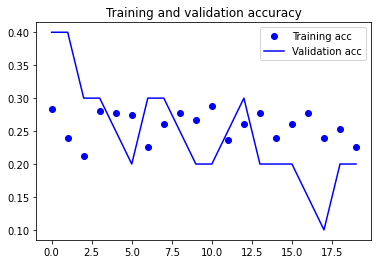

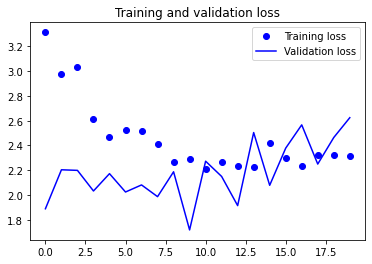

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_x = range(len(acc))

plt.plot(epochs_x, acc, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_x, loss, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Fine tuning last several layers.

In [34]:
# multiply_16
# set 'multiply_16' and following layers trainable
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'multiply_16':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
     

In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch= NUM_TRAIN //batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps= NUM_TEST //batch_size,
      verbose=1,
      use_multiprocessing=True,
      workers=4)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
<ipython-input-35-4287107a2cee>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
15/15 [==============================] - 24s 1s/step - loss: 2.0886 - acc: 0.2939 - val_loss: 2.7396 - val_acc: 0.2000
Epoch 2/20
15/15 [==============================] - 14s 806ms/step - loss: 2.2879 - acc: 0.2671 - val_loss: 2.5534 - val_acc: 0.2000
Epoch 3/20
15/15 [==============================] - 19s 1s/step - loss: 2.1372 - acc: 0.2601 - val_loss: 2.5788 - val_acc: 0.2000
Epoch 4/20
15/15 [==============================] - 16s 972ms/step - loss: 2.0734 - acc: 0.2669 - val_loss: 2.2004 - val_acc: 0.3000
Epoch 5/20
15/15 [==============================] - 14s 836ms/step - loss: 2.2807 - acc: 0.2365 - val_loss: 2.8297 - val_acc: 0.3000
Epoch 6/20
15/15 [==============================] - 17s 1s/step - loss: 2.0291 - acc: 0.2872 - val_loss: 2.4174 - val_acc: 0.3000
Epoch 7/20
15/15 [==============================] - 14s 824ms/step - loss: 2.2348 - acc: 0.2432 - val_loss: 2.5365 - val_acc: 0.2500
Epoch 8/20
15/15 [==============================] - 14s 831ms/step - loss: 2.1

In [36]:
os.makedirs("./models", exist_ok=True)
model.save('./models/SEM')

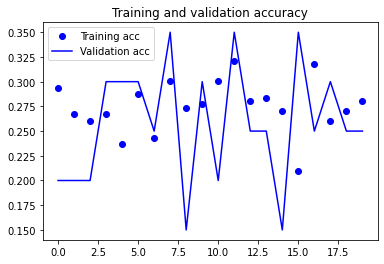

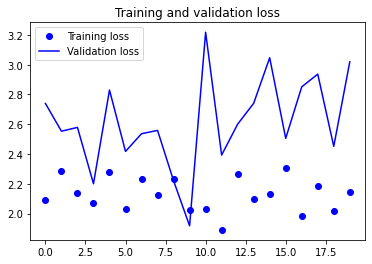

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_x = range(len(acc))

plt.plot(epochs_x, acc, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_x, loss, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
     

#Test predict

In [30]:
from tensorflow.keras.preprocessing import image
import pandas as pd
     

In [31]:
clases =['0-500','501-1000','1001-1500','1501-2000','2001-2500','2501-3000','3001-3500']
results = list()

for i in clases:
    img_path =val[val['Class']==i]['path_Picture'].tolist()
    for j in img_path:
        img = image.load_img(j, target_size=(height, width))
            # Convert it to a Numpy array with target shape.
        x = image.img_to_array(img)
            # Reshape
        x = x.reshape((1,) + x.shape)
        x /= 255.
        result = model.predict([x])[0]
        n = 10
        avgDists = result
        idxs = avgDists.argsort()[::-1][:n] #sort max
        predlist,problist = list(), list()
        for m in idxs:
            pred =  clases[m]
            prob = result[m]
            predlist.append(pred)
            problist.append(prob)
        act_true = i
        prob_max = problist[0]
        pred_max = predlist[0]
     

1/1 [==============================] - 0s 58ms/step


In [32]:
result 
     

array([5.1356423e-01, 2.2527297e-01, 4.8050731e-02, 7.1810186e-02,
       1.0217160e-03, 1.1858008e-04, 1.4016168e-01], dtype=float32)

In [33]:
print(pred_max,prob_max)

0-500 0.5135642


In [ ]:
#res = predict_image()

In [ ]:
#path = 
#class_actual =['Y7','Y8','Y9','Y10','Y11','Y12','Y13','Y16','Y17','Y18']
#class_predict =[]
#for p in range(len(path)):
   # path_ = path[p]
    #class_actual.append(class_[p])
    #res = predict_image(path_)

    #predict_prop = max(res)
    #predict_class = class_[np.argmax(res)]

    #class_predict.append(predict_class)

In [ ]:
#from sklearn.metrics import confusion_matrix
 
#cm = confusion_matrix(class_actual,class_predict)
#cm

In [ ]:
#from sklearn.metrics import classification_report

#target_names = ['8Years', '9Years', '10Years']
#print(classification_report(class_actual, class_predict, target_names=target_names))

# Download the model

In [ ]:

#from google.colab import files

#files.download('./models/Paranoma_Fil,.h5')

In [ ]:

#model.input_shape